# 전국 신규 민간 아파트 분양가격 동향


## 공부 내용
* 공공데이터를 활용해 전혀 다른 두 개의 데이터를 가져와서 전처리 하고 병합하기
* 수치형 데이터와 범주형 데이터를 바라보는 시각을 기르기
* 데이터의 형식에 따른 다양한 시각화 방법 이해하기


## 데이터
* 다운로드 위치 : https://www.data.go.kr/dataset/3035522/fileData.do

### 전국 평균 분양가격(2013년 9월부터 2015년 8월까지)
* 전국 공동주택의 3.3제곱미터당 평균분양가격 데이터를 제공

###  주택도시보증공사_전국 평균 분양가격(2019년 12월)
* 전국 공동주택의 연도별, 월별, 전용면적별 제곱미터당 평균분양가격 데이터를 제공
* 지역별 평균값은 단순 산술평균값이 아닌 가중평균값임

In [1]:
# 파이썬에서 쓸 수 있는 엑셀과도 유사한 판다스 라이브러리를 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 데이터시각화를 위한 폰트설정
한글폰트 사용을 위해 matplotlib의 pyplot을 plt라는 별칭으로 불러오기

In [2]:
import matplotlib.pyplot as plt

plt.rc("font", family="Malgun Gothic")
# plt.rc("font", family="AppleGothic")
plt.rc("axes", unicode_minus=False)

In [3]:
plt.rc("font",family="Malgun Gothic")
plt.rc("axes",unicode_minus=False)

## 데이터 로드
### 최근 파일 로드
공공데이터 포털에서 "주택도시보증공사_전국 평균 분양가격"파일을 다운로드 받아 불러오기

In [4]:
df_last=pd.read_csv("주택도시보증공사_전국 평균 분양가격(2019년 12월).csv",encoding="cp949")

df_last.shape

(4335, 5)

In [5]:
df_last.head()

,지역명,규모구분,연도,월,분양가격(㎡)
0,서울,전체,2015,10,5841
1,서울,전용면적 60㎡이하,2015,10,5652
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721
4,서울,전용면적 102㎡초과,2015,10,5879


In [6]:
df_last.tail()

,지역명,규모구분,연도,월,분양가격(㎡)
4330,제주,전체,2019,12,3882
4331,제주,전용면적 60㎡이하,2019,12,NaN
4332,제주,전용면적 60㎡초과 85㎡이하,2019,12,3898
4333,제주,전용면적 85㎡초과 102㎡이하,2019,12,NaN
4334,제주,전용면적 102㎡초과,2019,12,3601


### 2015년 부터 최근까지의 데이터 로드

In [7]:
df_first=pd.read_csv("전국 평균 분양가격(2013년 9월부터 2015년 8월까지).csv",encoding="cp949")
df_first.shape

(17, 22)

In [8]:
df_first.head()

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,...,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
0,서울,18189,17925,17925,18016,18098,19446,18867,18742,19274,...,20242,20269,20670,20670,19415,18842,18367,18374,18152,18443
1,부산,8111,8111,9078,8965,9402,9501,9453,9457,9411,...,9208,9208,9204,9235,9279,9327,9345,9515,9559,9581
2,대구,8080,8080,8077,8101,8267,8274,8360,8360,8370,...,8439,8253,8327,8416,8441,8446,8568,8542,8542,8795
3,인천,10204,10204,10408,10408,10000,9844,10058,9974,9973,...,10020,10020,10017,9876,9876,9938,10551,10443,10443,10449
4,광주,6098,7326,7611,7346,7346,7523,7659,7612,7622,...,7752,7748,7752,7756,7861,7914,7877,7881,8089,8231


In [9]:
df_first.tail()

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,...,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
12,전북,6282,6281,5946,5966,6277,6306,6351,6319,6436,...,6583,6583,6583,6583,6542,6551,6556,6601,6750,6580
13,전남,5678,5678,5678,5696,5736,5656,5609,5780,5685,...,5768,5784,5784,5833,5825,5940,6050,6243,6286,6289
14,경북,6168,6168,6234,6317,6412,6409,6554,6556,6563,...,6881,6989,6992,6953,6997,7006,6966,6887,7035,7037
15,경남,6473,6485,6502,6610,6599,6610,6615,6613,6606,...,7125,7332,7592,7588,7668,7683,7717,7715,7723,7665
16,제주,7674,7900,7900,7900,7900,7900,7914,7914,7914,...,7724,7739,7739,7739,7826,7285,7285,7343,7343,7343


### 데이터 요약하기

In [10]:
df_first.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   지역        17 non-null     object
 1   2013년12월  17 non-null     int64 
 2   2014년1월   17 non-null     int64 
 3   2014년2월   17 non-null     int64 
 4   2014년3월   17 non-null     int64 
 5   2014년4월   17 non-null     int64 
 6   2014년5월   17 non-null     int64 
 7   2014년6월   17 non-null     int64 
 8   2014년7월   17 non-null     int64 
 9   2014년8월   17 non-null     int64 
 10  2014년9월   17 non-null     int64 
 11  2014년10월  17 non-null     int64 
 12  2014년11월  17 non-null     int64 
 13  2014년12월  17 non-null     int64 
 14  2015년1월   17 non-null     int64 
 15  2015년2월   17 non-null     int64 
 16  2015년3월   17 non-null     int64 
 17  2015년4월   17 non-null     int64 
 18  2015년5월   17 non-null     int64 
 19  2015년6월   17 non-null     int64 
 20  2015년7월   17 non-null     int64 
 21  2015년8월   17 non-n

In [11]:
df_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4335 entries, 0 to 4334
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   지역명      4335 non-null   object
 1   규모구분     4335 non-null   object
 2   연도       4335 non-null   int64 
 3   월        4335 non-null   int64 
 4   분양가격(㎡)  4058 non-null   object
dtypes: int64(2), object(3)
memory usage: 169.5+ KB


### 결측치 보기

결측치는 True로 표시되는데, True == 1 이기 때문에 이 값을 다 더해주면 결측치의 수 =1

In [12]:
df_first.isnull().sum()

지역          0
2013년12월    0
2014년1월     0
2014년2월     0
2014년3월     0
2014년4월     0
2014년5월     0
2014년6월     0
2014년7월     0
2014년8월     0
2014년9월     0
2014년10월    0
2014년11월    0
2014년12월    0
2015년1월     0
2015년2월     0
2015년3월     0
2015년4월     0
2015년5월     0
2015년6월     0
2015년7월     0
2015년8월     0
dtype: int64

In [13]:
df_last.isnull().sum()

지역명          0
규모구분         0
연도           0
월            0
분양가격(㎡)    277
dtype: int64

### 데이터 타입 변경.

In [14]:
df_last["분양가격(㎡)"]=pd.to_numeric(df_last["분양가격(㎡)"],errors='coerce')
df_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4335 entries, 0 to 4334
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   지역명      4335 non-null   object 
 1   규모구분     4335 non-null   object 
 2   연도       4335 non-null   int64  
 3   월        4335 non-null   int64  
 4   분양가격(㎡)  3957 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 169.5+ KB


### 평당분양가격 구하기

분양가격을 평당기준으로 보기위해 3.3을 곱해서 "평당분양가격" 컬럼을 만들어 추가

In [15]:
df_last["평당분양가격"]=df_last["분양가격(㎡)"]*3.3
df_last["평당분양가격"].head()

0    19275.3
1    18651.6
2    19410.6
3    18879.3
4    19400.7
Name: 평당분양가격, dtype: float64

### 분양가격 요약하기

In [16]:
df_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4335 entries, 0 to 4334
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   지역명      4335 non-null   object 
 1   규모구분     4335 non-null   object 
 2   연도       4335 non-null   int64  
 3   월        4335 non-null   int64  
 4   분양가격(㎡)  3957 non-null   float64
 5   평당분양가격   3957 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 203.3+ KB


In [17]:
df_last["분양가격(㎡)"].describe()

count     3957.000000
mean      3238.128633
std       1264.309933
min       1868.000000
25%       2441.000000
50%       2874.000000
75%       3561.000000
max      12728.000000
Name: 분양가격(㎡), dtype: float64

In [18]:
df_last["평당분양가격"].describe()

count     3957.000000
mean     10685.824488
std       4172.222780
min       6164.400000
25%       8055.300000
50%       9484.200000
75%      11751.300000
max      42002.400000
Name: 평당분양가격, dtype: float64

### 규모구분을 전용면적 컬럼으로 변경

In [19]:
# 규모구분의 unique 값 보기
df_last["전용면적"]=df_last["규모구분"].str.replace("전용면적","")
df_last["전용면적"]=df_last["전용면적"].str.replace("초과","~")
df_last["전용면적"]=df_last["전용면적"].str.replace("이하","")
df_last["전용면적"]=df_last["전용면적"].str.replace(" ","")
df_last["전용면적"].unique

<bound method Series.unique of 0             전체
1            60㎡
2        60㎡~85㎡
3       85㎡~102㎡
4          102㎡~
          ...   
4330          전체
4331         60㎡
4332     60㎡~85㎡
4333    85㎡~102㎡
4334       102㎡~
Name: 전용면적, Length: 4335, dtype: object>

### 필요없는 컬럼 제거하기

In [20]:
df_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4335 entries, 0 to 4334
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   지역명      4335 non-null   object 
 1   규모구분     4335 non-null   object 
 2   연도       4335 non-null   int64  
 3   월        4335 non-null   int64  
 4   분양가격(㎡)  3957 non-null   float64
 5   평당분양가격   3957 non-null   float64
 6   전용면적     4335 non-null   object 
dtypes: float64(2), int64(2), object(3)
memory usage: 237.2+ KB


In [21]:
# axis 0:행, 1:열
df_last=df_last.drop(["분양가격(㎡)"],axis=1)
df_last=df_last.drop(["규모구분"],axis=1)

In [22]:
df_last

,지역명,연도,월,평당분양가격,전용면적
0,서울,2015,10,19275.3,전체
1,서울,2015,10,18651.6,60㎡
2,서울,2015,10,19410.6,60㎡~85㎡
3,서울,2015,10,18879.3,85㎡~102㎡
4,서울,2015,10,19400.7,102㎡~
...,...,...,...,...,...
4330,제주,2019,12,12810.6,전체
4331,제주,2019,12,NaN,60㎡
4332,제주,2019,12,12863.4,60㎡~85㎡
4333,제주,2019,12,NaN,85㎡~102㎡


In [23]:
df_last.info()
# 컬럼 제거를 통해 메모리 사용량이 줄어듬

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4335 entries, 0 to 4334
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   지역명     4335 non-null   object 
 1   연도      4335 non-null   int64  
 2   월       4335 non-null   int64  
 3   평당분양가격  3957 non-null   float64
 4   전용면적    4335 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 169.5+ KB


## groupby 로 데이터 집계하기
groupby 를 통해 데이터를 그룹화해서 연산을 해봅니다.

<AxesSubplot:title={'center':'지역별 평당 분양가격'}, xlabel='지역명'>

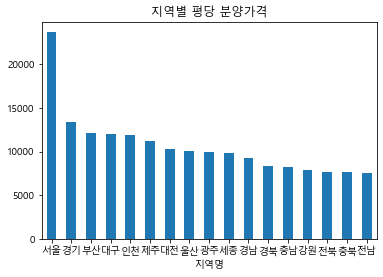

In [24]:
# df.groupby(["인덱스로 사용할 컬럼명"])["계산할 컬럼 값"].연산()
mean_price=df_last.groupby(["지역명"])["평당분양가격"].mean().sort_values(ascending=False)
mean_price.plot.bar(rot=0,title="지역별 평당 분양가격")

<AxesSubplot:title={'center':'전용면적당 분양가격'}, ylabel='전용면적'>

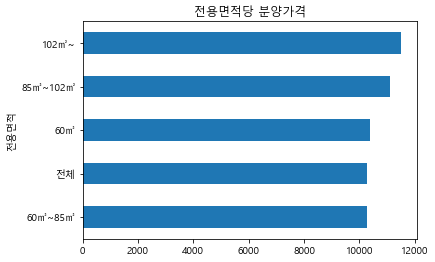

In [25]:
# 전용면적으로 분양가격의 평균을 구하기
k=df_last.groupby(["전용면적"])["평당분양가격"].mean().sort_values()
k.plot.barh(rot=0,title="전용면적당 분양가격")

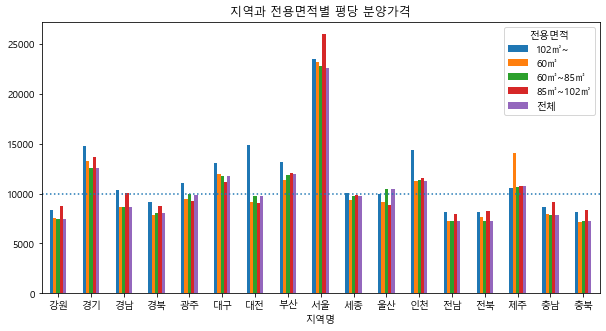

In [26]:
# 지역명, 전용면적으로 평당분양가격의 평균을 구하기

g=df_last.groupby(["지역명","전용면적"])["평당분양가격"].mean().sort_values(ascending=False).unstack("전용면적")
#unstack()함수는 중복된 값(ex.연, 월, 일)이 있을 때 사용하면 유용

g.plot.bar(rot=0,title="지역과 전용면적별 평당 분양가격",figsize=(10,5))
plt.axhline(10000,linestyle=":")


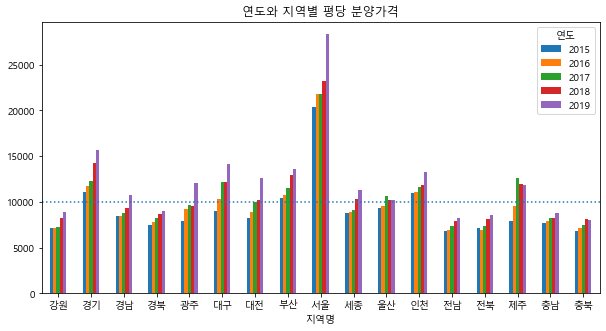

In [27]:
# 연도, 지역명으로 평당분양가격의 평균을 구하기
h=df_last.groupby(["연도","지역명"])["평당분양가격"].mean().sort_values(ascending=False).unstack("연도")
#unstack()함수는 중복된 값(ex.연, 월, 일)이 있을 때 사용하면 유용

h.plot.bar(rot=0,title="연도와 지역별 평당 분양가격",figsize=(10,5))
plt.axhline(10000,linestyle=":")

## pivot table 로 데이터 집계하기
* groupby 로 했던 작업을 pivot_table.

In [28]:
# 지역명을 index 로 평당분양가격 을 values 로 구하기
pd.pivot_table(data=df_last,index="지역명",values="평당분양가격")

,평당분양가격
지역명,
강원,7890.750000
경기,13356.895200
경남,9268.778138
경북,8376.536515
광주,9951.535821
대구,11980.895455
대전,10253.333333
부산,12087.121200
서울,23599.976400


In [29]:
# 전용면적을 index 로 평당분양가격 을 values 로 구합니다.
pd.pivot_table(data=df_last,index="전용면적",values="평당분양가격")


,평당분양가격
전용면적,
102㎡~,11517.705634
60㎡,10375.137421
60㎡~85㎡,10271.040071
85㎡~102㎡,11097.599573
전체,10276.086207


In [30]:
pd.pivot_table(data=df_last,index="전용면적",columns="지역명",values="평당분양가격").astype(int)

지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
전용면적,,,,,,,,,,,,,,,,,
102㎡~,8311,14771,10358,9157,11041,13087,14876,13208,23446,10106,9974,14362,8168,8193,10522,8689,8195
60㎡,7567,13251,8689,7883,9430,11992,9176,11353,23212,9323,9202,11241,7210,7609,14022,7911,7103
60㎡~85㎡,7485,12523,8618,8061,9910,11778,9711,11864,22786,9775,10502,11384,7269,7271,10621,7818,7264
85㎡~102㎡,8749,13677,10017,8773,9296,11140,9037,12072,25943,9847,8861,11527,7908,8275,10709,9120,8391
전체,7477,12559,8658,8078,9903,11771,9786,11936,22610,9805,10492,11257,7283,7292,10784,7815,7219


In [31]:
pd.pivot_table(data=df_last,index="연도",columns="지역명",values="평당분양가격").astype(int)

지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
연도,,,,,,,,,,,,,,,,,
2015,7188,11060,8459,7464,7916,9018,8190,10377,20315,8765,9367,10976,6798,7110,7951,7689,6828
2016,7162,11684,8496,7753,9190,10282,8910,10743,21753,8857,9582,11099,6936,6906,9567,7958,7133
2017,7273,12304,8786,8280,9613,12206,9957,11560,21831,9132,10666,11640,7372,7398,12566,8198,7473
2018,8219,14258,9327,8680,9526,12139,10234,12889,23202,10340,10241,11881,7929,8174,11935,8201,8149
2019,8934,15665,10697,9050,12111,14081,12619,13537,28286,11299,10216,13249,8219,8532,11828,8748,7970


## 최근 데이터 시각화 하기

### Seaborn 으로 시각화 해보기

<AxesSubplot:xlabel='지역명', ylabel='평당분양가격'>

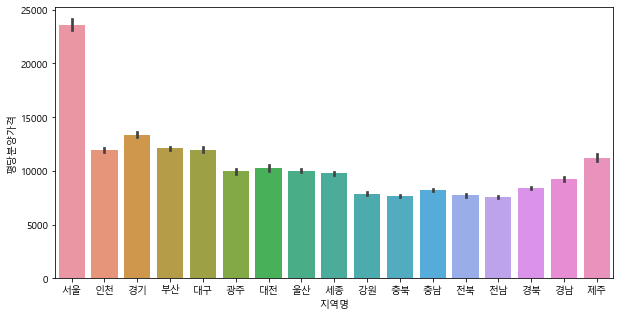

In [32]:
# barplot으로 지역별 평당분양가격을 그리기
plt.figure(figsize=(10,5))
sns.barplot(data=df_last,x="지역명",y="평당분양가격")

<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

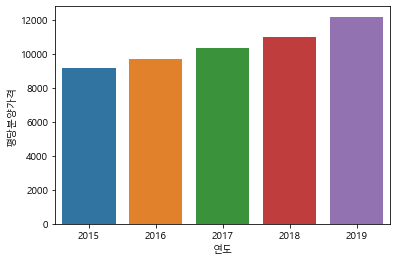

In [33]:
# barplot으로 연도별 평당분양가격을 그리기

sns.barplot(data=df_last,x="연도",y="평당분양가격",ci=None)

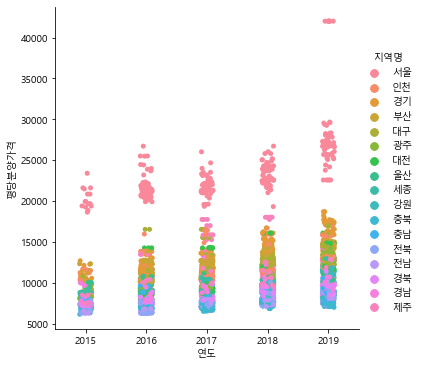

In [34]:
# catplot 으로 서브플롯 그리기
sns.catplot(data=df_last,x="연도",y="평당분양가격",ci=None,hue="지역명")

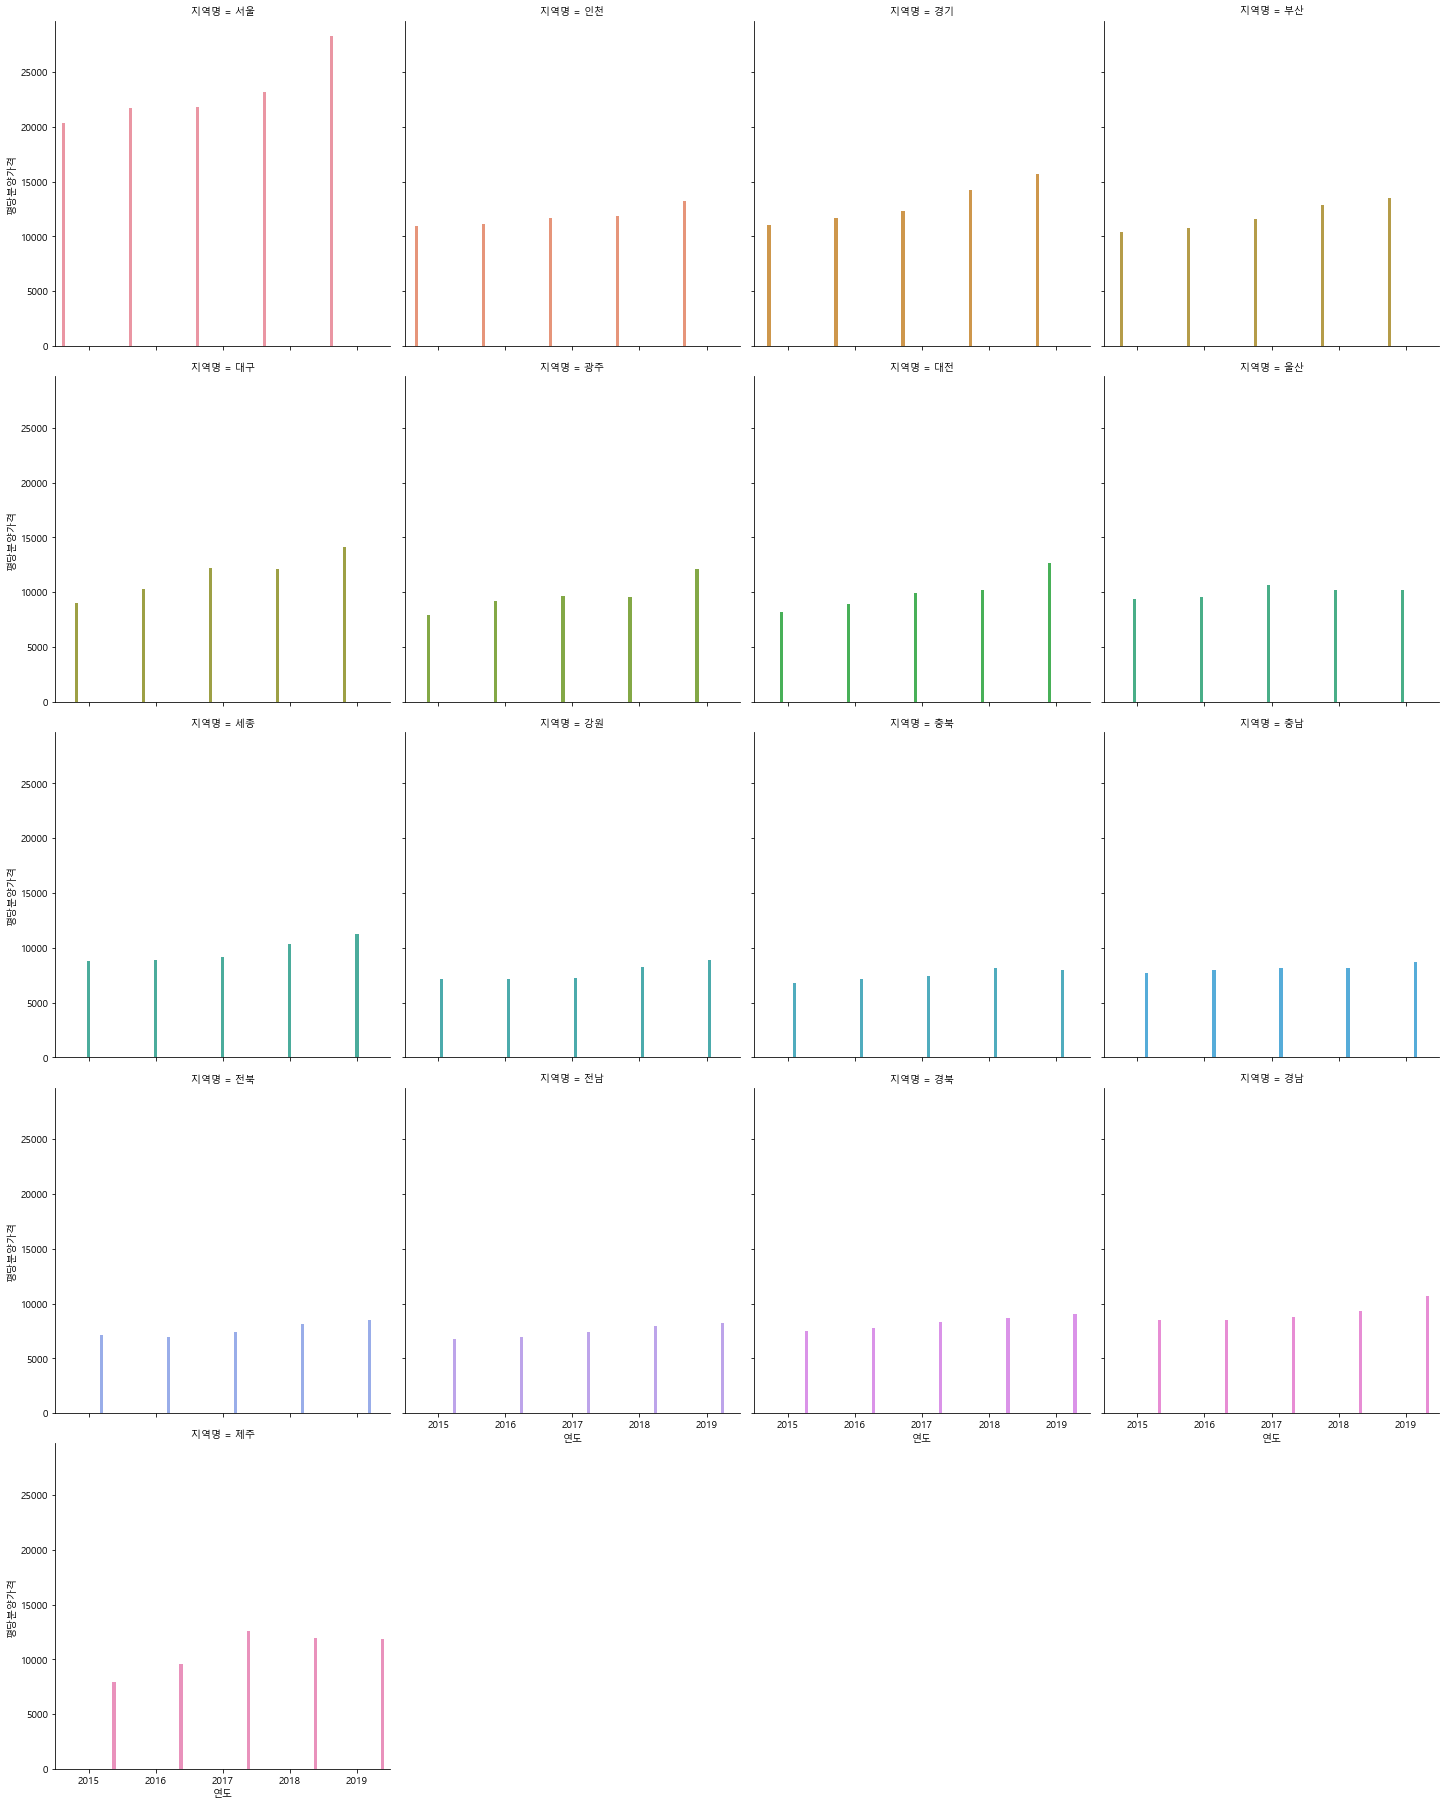

In [35]:
sns.catplot(data=df_last,x="연도",y="평당분양가격",kind="bar",ci=None,hue="지역명",col="지역명",col_wrap=4)

<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

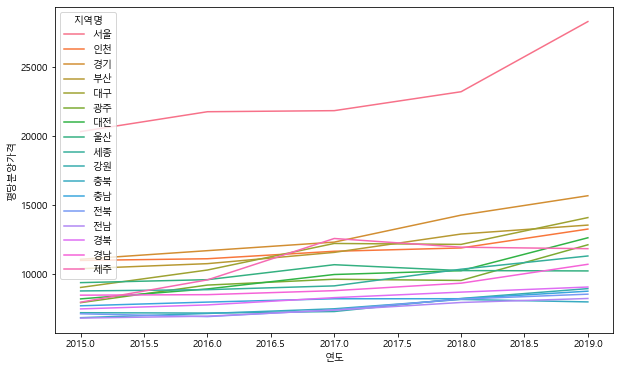

In [36]:
# lineplot으로 연도별 평당분양가격을 그리기
plt.figure(figsize=(10,6))
sns.lineplot(data=df_last,x="연도",y="평당분양가격",hue="지역명",ci=None)

<Figure size 720x432 with 0 Axes>

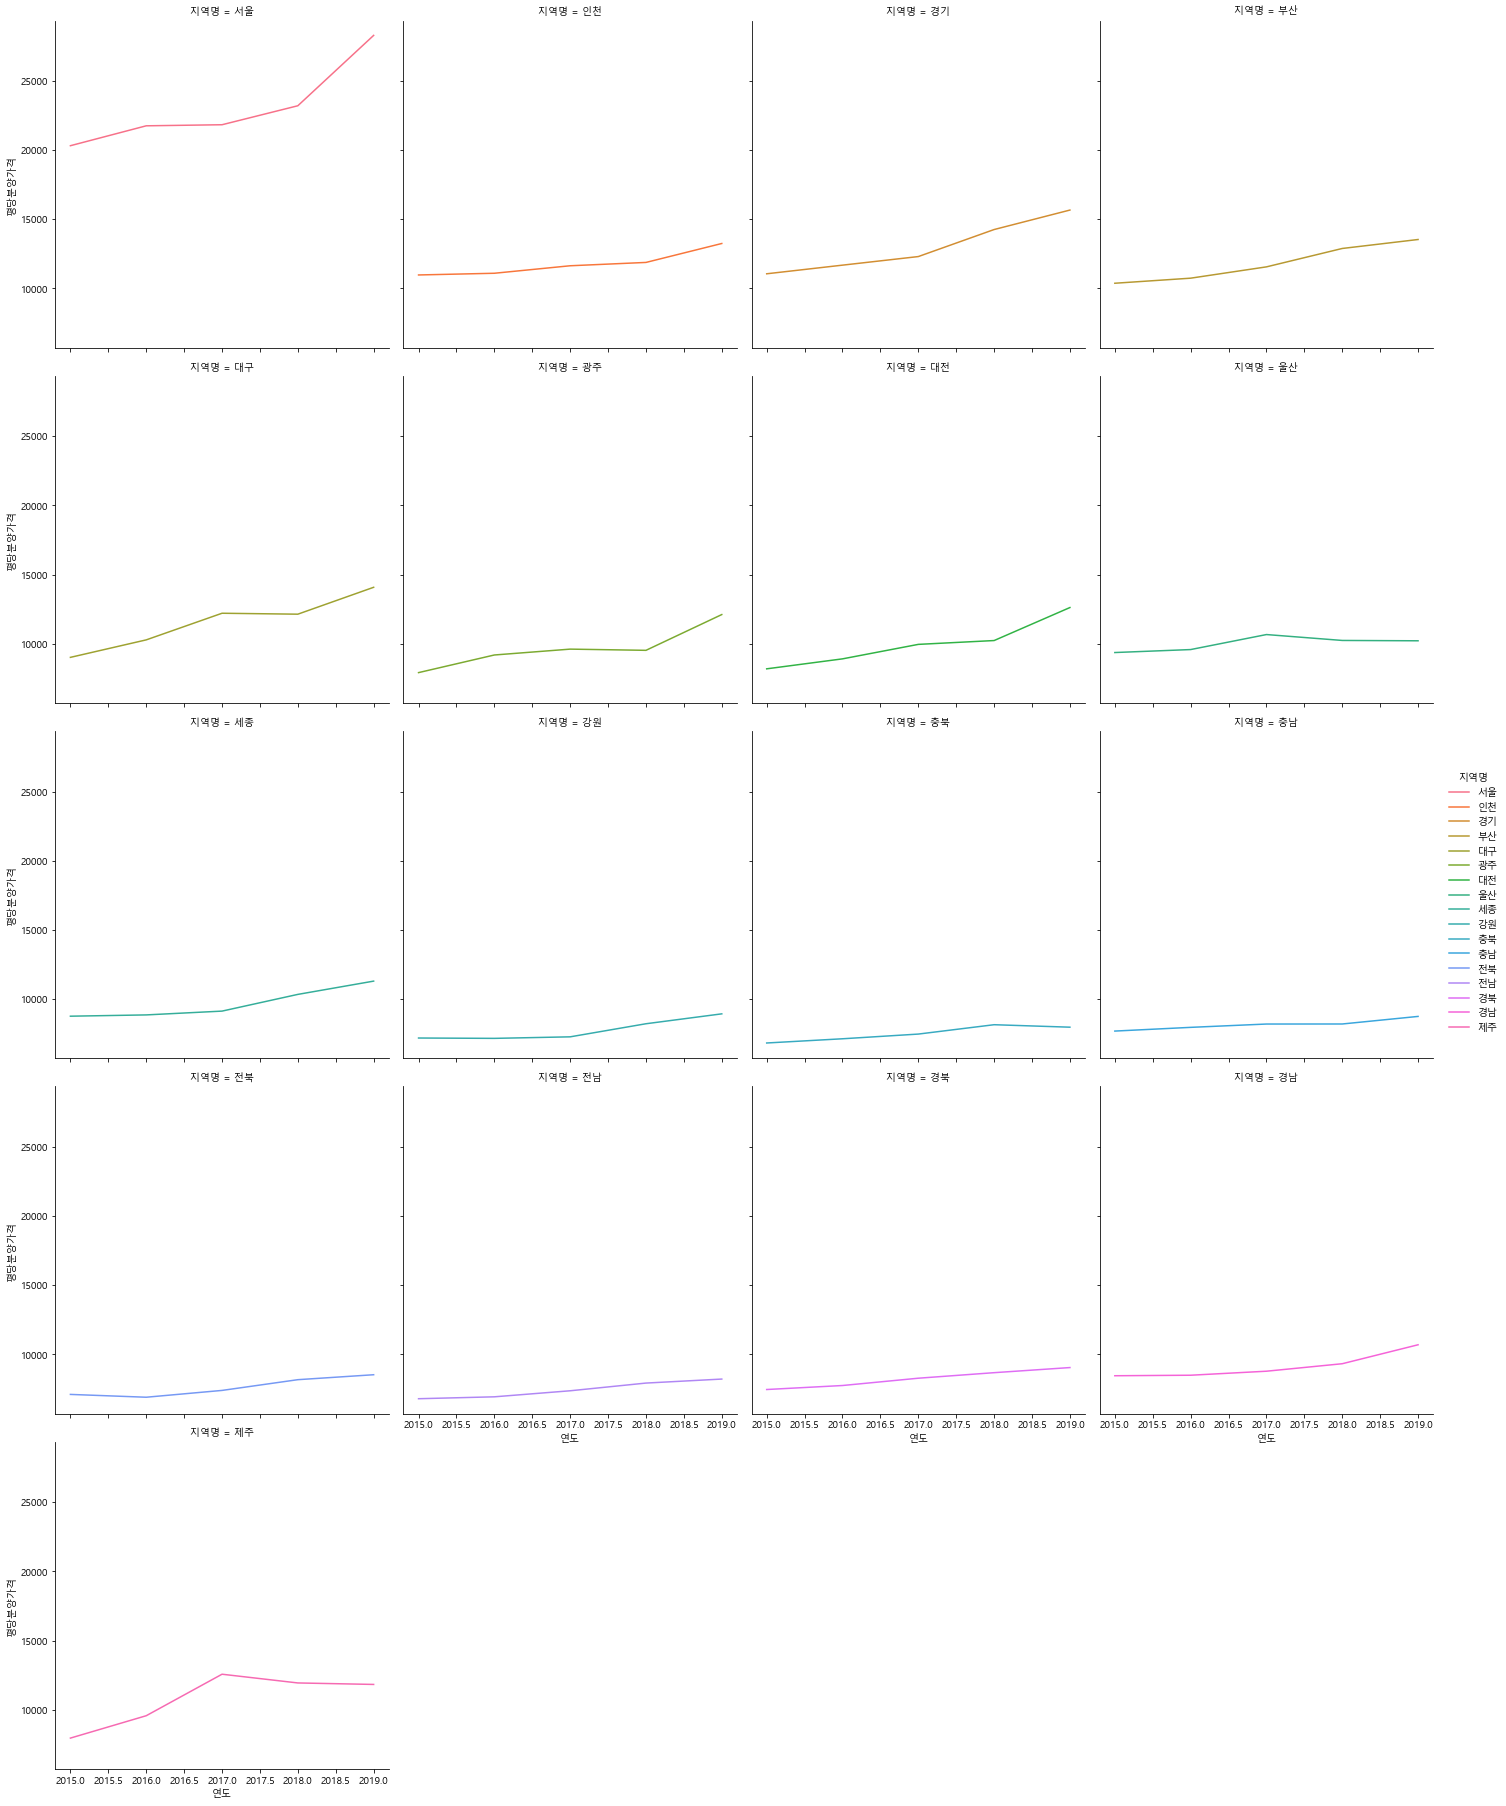

In [37]:
# relplot 으로 서브플롯 그리기
plt.figure(figsize=(10,6))
sns.relplot(data=df_last,x="연도",y="평당분양가격",hue="지역명",ci=None,kind="line",col="지역명",col_wrap=4)

<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

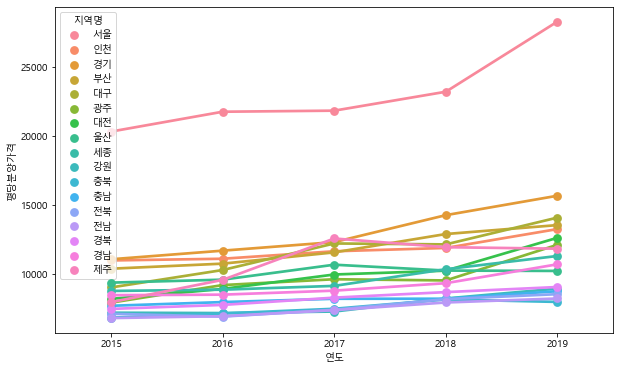

In [38]:
# pointplot 으로 서브플롯 그리기
plt.figure(figsize=(10,6))
sns.pointplot(data=df_last,x="연도",y="평당분양가격",hue="지역명",ci=None)

### boxplot과 violinplot

<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

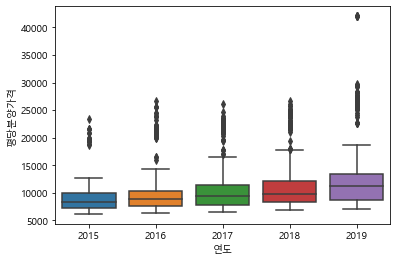

In [39]:
# 연도별 평당분양가격을 boxplot으로 그리기
# 최댓값
sns.boxplot(data=df_last,x="연도",y="평당분양가격")


<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

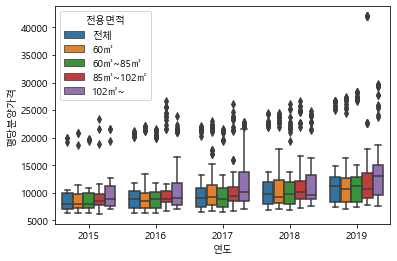

In [40]:
# hue옵션을 주어 전용면적별로 다르게 표시하기
sns.boxplot(data=df_last,x="연도",y="평당분양가격",hue="전용면적")



<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

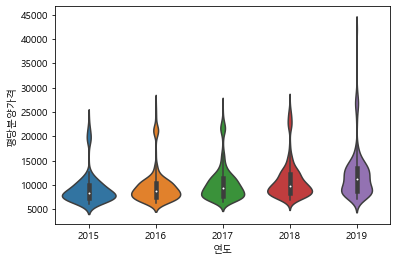

In [41]:
# 연도별 평당분양가격을 violinplot으로 그리기

sns.violinplot(data=df_last,x="연도",y="평당분양가격")


### lmplot과 swarmplot 

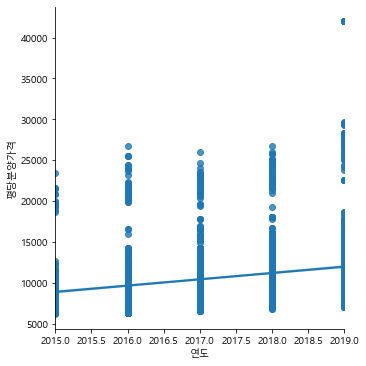

In [42]:
# 연도별 평당분양가격을 lmplot으로 그리기

sns.lmplot(data=df_last,x="연도",y="평당분양가격")


<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

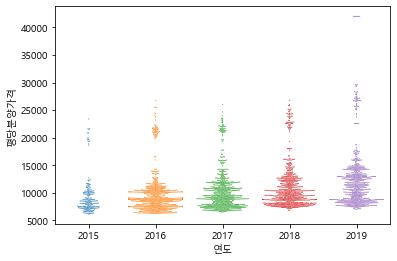

In [43]:
# 연도별 평당분양가격을 swarmplot 으로 그리기
# swarmplot은 범주형(카테고리) 데이터의 산점도를 표현하기에 적합
sns.swarmplot(data=df_last,x="연도",y="평당분양가격",size=1)

### 이상치 보기

In [44]:
# 서울의 평당분양가격이 특히 높은 데이터가 있다. 해당 데이터를 가져오기.
df_last[df_last["평당분양가격"]>40000]

,지역명,연도,월,평당분양가격,전용면적
3743,서울,2019,6,42002.4,85㎡~102㎡
3828,서울,2019,7,42002.4,85㎡~102㎡
3913,서울,2019,8,42002.4,85㎡~102㎡
3998,서울,2019,9,42002.4,85㎡~102㎡
4083,서울,2019,10,42002.4,85㎡~102㎡
4168,서울,2019,11,42002.4,85㎡~102㎡
4253,서울,2019,12,42002.4,85㎡~102㎡


### 수치데이터 히스토그램 그리기

array([[<AxesSubplot:title={'center':'연도'}>,
        <AxesSubplot:title={'center':'월'}>],
       [<AxesSubplot:title={'center':'평당분양가격'}>, <AxesSubplot:>]],
      dtype=object)

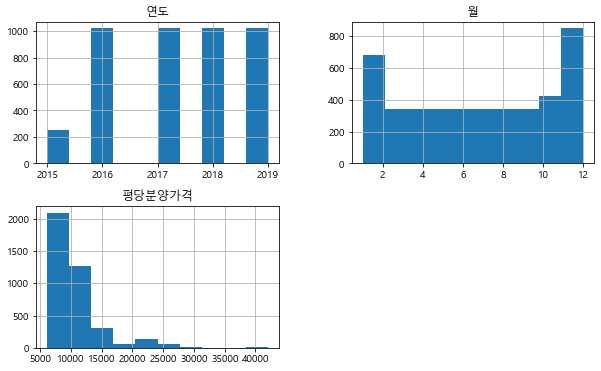

In [45]:
#hist
df_last.hist(figsize=(10,6))

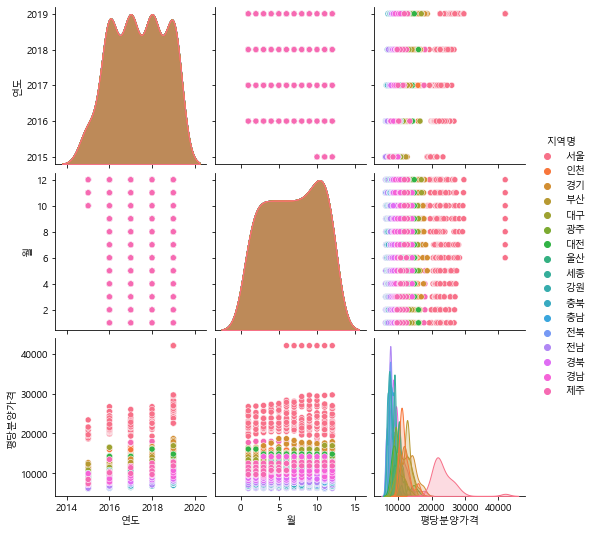

In [46]:
# pairplot

sns.pairplot(data=df_last,hue="지역명")

## 2015년 8월 이전 데이터 보기

In [47]:
pd.options.display.max_columns=None

In [48]:
df_first.head()

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,2014년9월,2014년10월,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
0,서울,18189,17925,17925,18016,18098,19446,18867,18742,19274,19404,19759,20242,20269,20670,20670,19415,18842,18367,18374,18152,18443
1,부산,8111,8111,9078,8965,9402,9501,9453,9457,9411,9258,9110,9208,9208,9204,9235,9279,9327,9345,9515,9559,9581
2,대구,8080,8080,8077,8101,8267,8274,8360,8360,8370,8449,8403,8439,8253,8327,8416,8441,8446,8568,8542,8542,8795
3,인천,10204,10204,10408,10408,10000,9844,10058,9974,9973,9973,10016,10020,10020,10017,9876,9876,9938,10551,10443,10443,10449
4,광주,6098,7326,7611,7346,7346,7523,7659,7612,7622,7802,7707,7752,7748,7752,7756,7861,7914,7877,7881,8089,8231


In [49]:
df_first.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   지역        17 non-null     object
 1   2013년12월  17 non-null     int64 
 2   2014년1월   17 non-null     int64 
 3   2014년2월   17 non-null     int64 
 4   2014년3월   17 non-null     int64 
 5   2014년4월   17 non-null     int64 
 6   2014년5월   17 non-null     int64 
 7   2014년6월   17 non-null     int64 
 8   2014년7월   17 non-null     int64 
 9   2014년8월   17 non-null     int64 
 10  2014년9월   17 non-null     int64 
 11  2014년10월  17 non-null     int64 
 12  2014년11월  17 non-null     int64 
 13  2014년12월  17 non-null     int64 
 14  2015년1월   17 non-null     int64 
 15  2015년2월   17 non-null     int64 
 16  2015년3월   17 non-null     int64 
 17  2015년4월   17 non-null     int64 
 18  2015년5월   17 non-null     int64 
 19  2015년6월   17 non-null     int64 
 20  2015년7월   17 non-null     int64 
 21  2015년8월   17 non-n

In [50]:
df_first.isnull().sum()

지역          0
2013년12월    0
2014년1월     0
2014년2월     0
2014년3월     0
2014년4월     0
2014년5월     0
2014년6월     0
2014년7월     0
2014년8월     0
2014년9월     0
2014년10월    0
2014년11월    0
2014년12월    0
2015년1월     0
2015년2월     0
2015년3월     0
2015년4월     0
2015년5월     0
2015년6월     0
2015년7월     0
2015년8월     0
dtype: int64

### melt로 Tidy data 만들기
pandas의 melt를 사용하면 데이터의 형태를 변환 
df_first 변수에 담긴 데이터프레임은 df_last에 담겨있는 데이터프레임의 모습과 다르다.
같은 형태로 만들어주어야 데이터를 합한다. 
데이터를 병합하기 위해 melt를 사용해 열에 있는 데이터를 행으로 녹여본다.
* https://pandas.pydata.org/docs/user_guide/reshaping.html#reshaping-by-melt
* [Tidy Data 란?](https://vita.had.co.nz/papers/tidy-data.pdf)

In [51]:
df_first.head()

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,2014년9월,2014년10월,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
0,서울,18189,17925,17925,18016,18098,19446,18867,18742,19274,19404,19759,20242,20269,20670,20670,19415,18842,18367,18374,18152,18443
1,부산,8111,8111,9078,8965,9402,9501,9453,9457,9411,9258,9110,9208,9208,9204,9235,9279,9327,9345,9515,9559,9581
2,대구,8080,8080,8077,8101,8267,8274,8360,8360,8370,8449,8403,8439,8253,8327,8416,8441,8446,8568,8542,8542,8795
3,인천,10204,10204,10408,10408,10000,9844,10058,9974,9973,9973,10016,10020,10020,10017,9876,9876,9938,10551,10443,10443,10449
4,광주,6098,7326,7611,7346,7346,7523,7659,7612,7622,7802,7707,7752,7748,7752,7756,7861,7914,7877,7881,8089,8231


In [52]:
# pd.melt 를 사용하며, 녹인 데이터는 df_first_melt 변수에 담기
df_first_melt=pd.melt(df_first,id_vars="지역")
df_first_melt

,지역,variable,value
0,서울,2013년12월,18189
1,부산,2013년12월,8111
2,대구,2013년12월,8080
3,인천,2013년12월,10204
4,광주,2013년12월,6098
...,...,...,...
352,전북,2015년8월,6580
353,전남,2015년8월,6289
354,경북,2015년8월,7037
355,경남,2015년8월,7665


In [53]:
df_first_melt.columns=["지역명","기간","평당분양가격"]
df_first_melt

,지역명,기간,평당분양가격
0,서울,2013년12월,18189
1,부산,2013년12월,8111
2,대구,2013년12월,8080
3,인천,2013년12월,10204
4,광주,2013년12월,6098
...,...,...,...
352,전북,2015년8월,6580
353,전남,2015년8월,6289
354,경북,2015년8월,7037
355,경남,2015년8월,7665


### 연도와 월을 분리하기
* pandas 의 string-handling 사용하기 : https://pandas.pydata.org/pandas-docs/stable/reference/series.html#string-handling

In [54]:
date = "2013년12월"
date

'2013년12월'

In [55]:
a=date.split("년")
a

['2013', '12월']

In [56]:
a[0]

'2013'

In [57]:

a[1].replace("월","")

'12'

In [58]:
def parse_year(date):
        a=date.split("년")[0]
        a=int(a)
        return(a)
    

In [59]:
parse_year(date)


2013

In [60]:
def parse_month(date):
        a=date.split("년")
        b=int(a[1].replace("월",""))
        return b
    

In [61]:
parse_month(date)

12

In [62]:
parse_month

<function __main__.parse_month(date)>

In [63]:
df_first_melt["연도"]=df_first_melt["기간"].apply(parse_year)
df_first_melt

,지역명,기간,평당분양가격,연도
0,서울,2013년12월,18189,2013
1,부산,2013년12월,8111,2013
2,대구,2013년12월,8080,2013
3,인천,2013년12월,10204,2013
4,광주,2013년12월,6098,2013
...,...,...,...,...
352,전북,2015년8월,6580,2015
353,전남,2015년8월,6289,2015
354,경북,2015년8월,7037,2015
355,경남,2015년8월,7665,2015


In [64]:
df_first_melt["월"]=df_first_melt["기간"].apply(parse_month)
df_first_melt


,지역명,기간,평당분양가격,연도,월
0,서울,2013년12월,18189,2013,12
1,부산,2013년12월,8111,2013,12
2,대구,2013년12월,8080,2013,12
3,인천,2013년12월,10204,2013,12
4,광주,2013년12월,6098,2013,12
...,...,...,...,...,...
352,전북,2015년8월,6580,2015,8
353,전남,2015년8월,6289,2015,8
354,경북,2015년8월,7037,2015,8
355,경남,2015년8월,7665,2015,8


In [65]:
df_first_melt.columns.tolist()

['지역명', '기간', '평당분양가격', '연도', '월']

In [66]:
# df_last와 병합을 하기 위해서는 컬럼의 이름이 같아야 한다.
df_last.head()
df_last

,지역명,연도,월,평당분양가격,전용면적
0,서울,2015,10,19275.3,전체
1,서울,2015,10,18651.6,60㎡
2,서울,2015,10,19410.6,60㎡~85㎡
3,서울,2015,10,18879.3,85㎡~102㎡
4,서울,2015,10,19400.7,102㎡~
...,...,...,...,...,...
4330,제주,2019,12,12810.6,전체
4331,제주,2019,12,NaN,60㎡
4332,제주,2019,12,12863.4,60㎡~85㎡
4333,제주,2019,12,NaN,85㎡~102㎡


In [67]:
cols = ['지역명', '연도', '월', '평당분양가격']
cols

['지역명', '연도', '월', '평당분양가격']

In [68]:
# 이전 데이터에는 전용면적이 없기 때문에 "전체"만 사용하기

df_last_prepare=df_last.loc[df_last["전용면적"]=="전체",cols]
df_last_prepare.shape

(867, 4)

In [69]:
df_first_prepare=df_first_melt[cols]
df_first_prepare.shape

(357, 4)

### concat 으로 데이터 합치기
* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html

In [70]:
df=pd.concat([df_first_prepare,df_last_prepare])
df.shape

(1224, 4)

In [71]:
df.head()

,지역명,연도,월,평당분양가격
0,서울,2013,12,18189.0
1,부산,2013,12,8111.0
2,대구,2013,12,8080.0
3,인천,2013,12,10204.0
4,광주,2013,12,6098.0


In [72]:
df["연도"].value_counts()


2014    204
2016    204
2017    204
2018    204
2019    204
2015    187
2013     17
Name: 연도, dtype: int64

### pivot_table 사용하기
* https://pandas.pydata.org/docs/user_guide/reshaping.html#reshaping-and-pivot-tables

In [73]:
k=pd.pivot_table(data=df,index="연도",columns="지역명",values="평당분양가격")
k

지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
연도,,,,,,,,,,,,,,,,,
2013,6230.000000,10855.000000,6473.000000,6168.000000,6098.000000,8080.000000,8321.000000,8111.000000,18189.00,7601.000000,8090.000000,10204.000000,5678.000000,6282.000000,7674.000000,6365.000000,6589.000000
2014,6332.500000,10509.083333,6728.750000,6536.500000,7587.833333,8286.083333,8240.333333,9180.166667,18997.25,8085.333333,8361.666667,10074.833333,5718.916667,6362.333333,7855.166667,6681.583333,6620.000000
2015,6831.154545,10489.109091,7646.163636,7035.063636,7956.090909,8706.718182,8104.509091,9633.272727,19282.60,8641.227273,9273.336364,10276.845455,6109.263636,6623.290909,7465.327273,7024.490909,6699.572727
2016,7011.125000,11220.000000,7847.950000,7360.650000,8898.725000,10310.025000,8501.625000,10429.925000,20663.50,8860.500000,10208.550000,10532.500000,6488.625000,6417.950000,9129.175000,7330.675000,6770.225000
2017,7126.800000,11850.000000,8119.800000,7794.900000,9463.500000,11455.800000,9044.700000,11577.900000,21375.90,9135.300000,11345.100000,10736.700000,7187.700000,7057.800000,10830.900000,7456.200000,6762.600000
2018,7680.750000,13185.975000,9019.450000,8505.200000,9855.725000,12075.800000,10180.225000,12997.875000,22889.35,10354.850000,10241.400000,11273.900000,7789.100000,7625.750000,11890.725000,8012.675000,7874.075000
2019,8141.650000,14468.850000,9870.850000,8856.650000,11822.800000,13852.025000,11777.700000,13116.400000,26131.05,11078.925000,10022.100000,12634.875000,7902.400000,8196.650000,12137.950000,8606.950000,7574.600000


In [74]:
k.astype(int).style.background_gradient()

지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
연도,,,,,,,,,,,,,,,,,
2013,6230,10855,6473,6168,6098,8080,8321,8111,18189,7601,8090,10204,5678,6282,7674,6365,6589
2014,6332,10509,6728,6536,7587,8286,8240,9180,18997,8085,8361,10074,5718,6362,7855,6681,6620
2015,6831,10489,7646,7035,7956,8706,8104,9633,19282,8641,9273,10276,6109,6623,7465,7024,6699
2016,7011,11220,7847,7360,8898,10310,8501,10429,20663,8860,10208,10532,6488,6417,9129,7330,6770
2017,7126,11849,8119,7794,9463,11455,9044,11577,21375,9135,11345,10736,7187,7057,10830,7456,6762
2018,7680,13185,9019,8505,9855,12075,10180,12997,22889,10354,10241,11273,7789,7625,11890,8012,7874
2019,8141,14468,9870,8856,11822,13852,11777,13116,26131,11078,10022,12634,7902,8196,12137,8606,7574


<AxesSubplot:xlabel='지역명', ylabel='연도'>

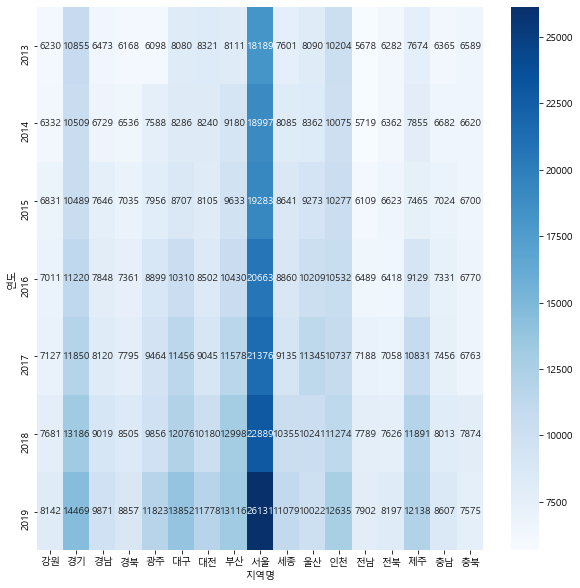

In [75]:
plt.figure(figsize=(10,10))
sns.heatmap(data=k, annot=True,cmap="Blues",fmt=".0f") #전체


<AxesSubplot:xlabel='연도', ylabel='지역명'>

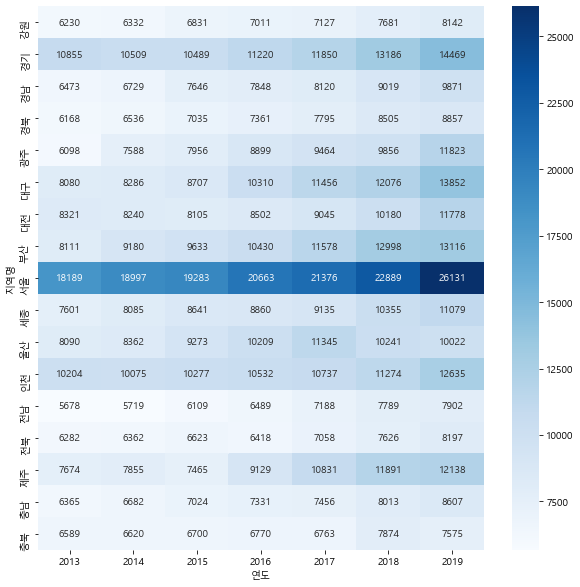

In [76]:
# 바뀐 행과 열을 히트맵으로 표현
plt.figure(figsize=(10,10))
sns.heatmap(data=k.T, annot=True,cmap="Blues",fmt=".0f") #전체


## 2013년부터 최근 데이터까지 시각화하기
### 연도별 평당분양가격 보기

<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

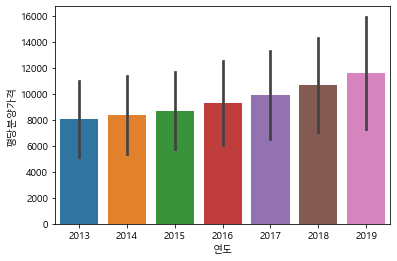

In [77]:
sns.barplot(data=df,x="연도",y="평당분양가격",ci="sd")

<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

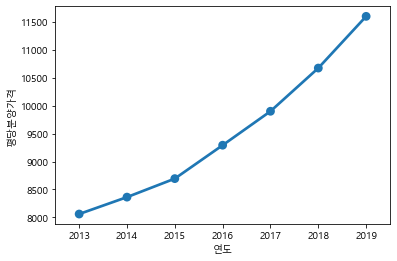

In [78]:
sns.pointplot(data=df,x="연도",y="평당분양가격",ci=None)

<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

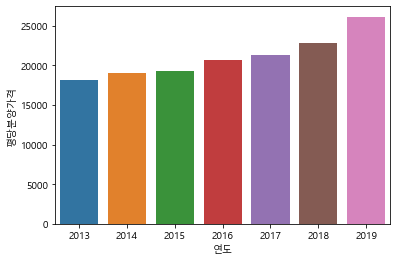

In [79]:
sns.barplot(data=df[df["지역명"]=="서울"],x="연도",y="평당분양가격",ci=None)

<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

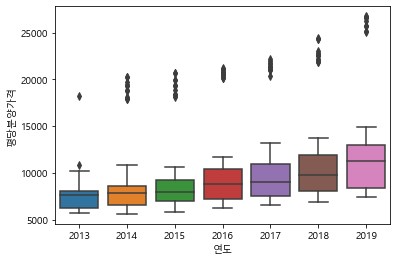

In [80]:
sns.boxplot(data=df,x="연도",y="평당분양가격")

<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

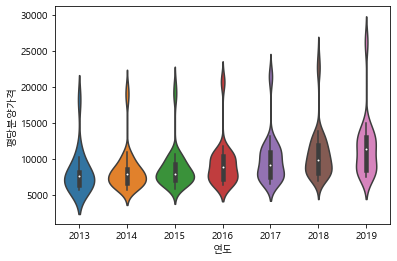

In [81]:
sns.violinplot(data=df,x="연도",y="평당분양가격")

<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

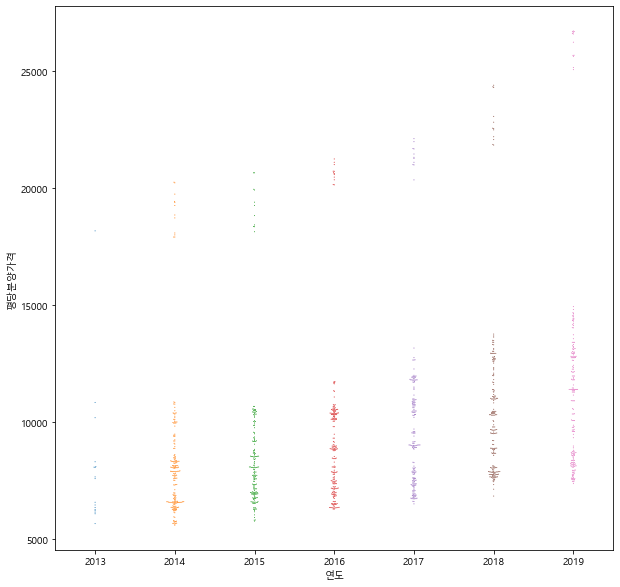

In [82]:
plt.figure(figsize=(10,10))
sns.swarmplot(data=df,x="연도",y="평당분양가격",size=1)

### 지역별 평당분양가격 보기

<AxesSubplot:xlabel='지역명', ylabel='평당분양가격'>

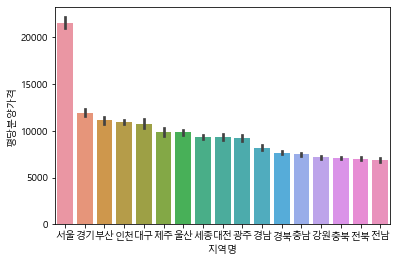

In [83]:
p=df.groupby("지역명")["평당분양가격"].mean().sort_values(ascending=False)
p.index
sns.barplot(data=df.sort_values("지역명"),x="지역명",y="평당분양가격",order=p.index)

<AxesSubplot:xlabel='지역명', ylabel='평당분양가격'>

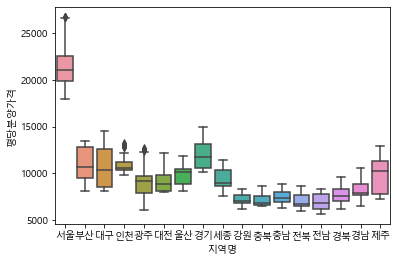

In [84]:
sns.boxplot(data=df,x="지역명",y="평당분양가격")

<AxesSubplot:xlabel='지역명', ylabel='평당분양가격'>

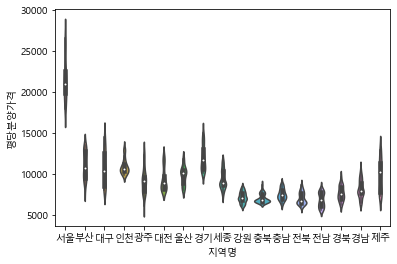

In [85]:
sns.violinplot(data=df,x="지역명",y="평당분양가격")

C:\Users\82109\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 5.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='지역명', ylabel='평당분양가격'>

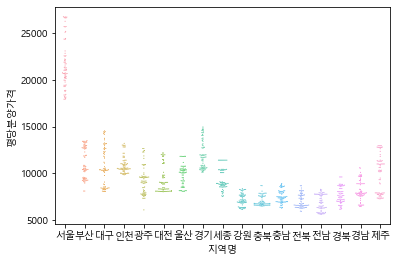

In [86]:
sns.swarmplot(data=df,x="지역명",y="평당분양가격",size=1)